## setup

In [0]:
%%capture
!apt-get -y install fonts-ipafont-gothic

In [11]:
import matplotlib
matplotlib.get_cachedir()

'/root/.cache/matplotlib'

In [10]:
!ls /root/.cache/matplotlib/

fontlist-v310.json  tex.cache


In [0]:
!rm /root/.cache/matplotlib/fontlist-v310.json

## loop

In [0]:
!rm -rf ai-watch-data/ 
!git clone https://github.com/2lu3/ai-watch-data.git
import sys
sys.path.append('ai-watch-data/mymodules')
from dataset import Dataset
from preprocessing import Preprocessing
from calculatescore import CalculateF1Score

In [0]:
jp_font = {'fontname':'IPAGothic'}

In [3]:
dataset = Dataset()
data_by_year = [dataset.get_dataset([[['tokyo'], [year], [5,9]]]) for year in range(2008, 2019)]
all_data = dataset.get_dataset([[['tokyo'], [year for year in range(2008, 2019)], [5,9]]])

loaded heatstroke  ['2018', '2014', '2011', '2008', '2015', '2010', '2017', '2013', '2009', '2012', '2016']
loaded weather ['okinawa', 'hyogo', 'osaka', 'tokyo']
loaded population and code ['コード', '英語名', '人口']


In [0]:
import pandas as pd

def delUnneededData(dataset, droplist=None):
  try:
    data = dataset.dropna(subset=['人数'])
    data = data.drop(['人口', '傷病程度：その他', '傷病程度：死亡', '傷病程度：軽症', '傷病程度：中等症', '傷病程度：重症', '年齢区分：不明', '年齢区分：新生児', '年齢区分：乳幼児', '年齢区分：少年', '年齢区分：成人', '年齢区分：高齢者', '発生場所：その他', '発生場所：仕事場①', '発生場所：仕事場②', '発生場所：住居', '発生場所：公衆(屋内)', '発生場所：公衆(屋外)', '発生場所：教育機関', '発生場所：道路', '県名', '天気概況(夜)', '天気概況(昼)'], axis=1)
    line = ['日付', '人数', '最高気温', '平均気温', '最低気温', '降水量', '平均蒸気圧', '平均雲量', '平均風速']
    if droplist is not None:
      for column_name in droplist:
        line = line.remove(column_name)
      data = data.drop(droplist, axis=1)
    data = data.loc[:,line]
  except KeyError as e:
    print(e)
  return data

In [14]:
data = delUnneededData(all_data)
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
data = data.sort_values('平均雲量', ascending=False)
# data = data.sort_values('最高気温', ascending=False)
data = data.reset_index(drop=True)
split = [0, 20, 25, 30, 35, 100]
def split_data(data):
  for i in range(len(split) - 1):
    if split[i] <= data and data < split[i + 1]:
      return i
  return -1

split = [0, 20, 25, 30, 35, 100]
  # 0: 0 ~ 20
# 1: 20 ~ 25
# 2: 25 ~ 30
# 3: 30 ~ 35
# 4: 35 ~
# data['最高気温'] = data['最高気温'].apply(split_data)
# 0 ~ 10
split = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 10000]
data['n人数'] = data['人数'].apply(split_data)

data = data.loc[:,['日付', 'n人数', '人数', '最高気温', '平均気温', '最低気温', '降水量', '平均蒸気圧', '平均雲量', '平均風速']]
start_point = 20
data
# data[start_point:start_point+20]

,日付,n人数,人数,最高気温,平均気温,最低気温,降水量,平均蒸気圧,平均雲量,平均風速
0,2017/5/10,0,1.0,17.9,16.3,15.1,4.0,17.6,10.0,1.7
1,2017/7/1,0,2.0,25.3,23.4,22.1,2.0,25.9,10.0,2.1
2,2011/8/20,1,7.0,25.8,23.7,22.3,0.0,21.1,10.0,2.1
3,2011/8/2,2,12.0,29.1,25.5,22.0,0.0,22.5,10.0,2.3
4,2011/8/19,4,31.0,30.9,25.3,22.0,57.0,24.9,10.0,2.9
5,2017/6/13,0,0.0,19.4,16.9,14.8,9.5,17.6,10.0,2.5
6,2013/9/4,2,12.0,30.8,27.9,24.7,14.0,30.7,10.0,4.6
7,2017/6/18,0,2.0,22.5,19.5,17.7,11.5,19.2,10.0,2.7
8,2017/6/22,1,8.0,27.9,24.0,20.0,0.0,18.3,10.0,3.1
9,2013/9/6,1,6.0,28.3,26.0,24.0,0.0,25.1,10.0,2.8


In [9]:
data = all_data.drop(['人口', ''])
data = data.dropna()

,人口,人数,傷病程度：その他,傷病程度：中等症,傷病程度：死亡,傷病程度：軽症,傷病程度：重症,天気概況(夜),天気概況(昼),平均気温,平均湿度,平均現地気圧,平均蒸気圧,平均雲量,平均風速,年齢区分：不明,年齢区分：乳幼児,年齢区分：少年,年齢区分：成人,年齢区分：新生児,年齢区分：高齢者,日付,日照時間,最低気温,最高気温,発生場所：その他,発生場所：仕事場①,発生場所：仕事場②,発生場所：住居,発生場所：公衆(屋内),発生場所：公衆(屋外),発生場所：教育機関,発生場所：道路,県名,降水量
0,13843403,0.0,0.0,0.0,0.0,0.0,0.0,曇,薄曇後一時晴,21.8,71,1008.3,18.4,9.5,2.7,0.0,0.0,0.0,0.0,0.0,0.0,2008/7/1,7.8,18.6,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tokyo,0.0
1,13843403,2.0,0.0,0.0,0.0,1.0,1.0,曇,曇,24.6,70,1005.6,21.4,9.0,2.3,0.0,0.0,0.0,1.0,0.0,1.0,2008/7/10,2.5,22.1,27.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tokyo,0.0
2,13843403,6.0,0.0,4.0,0.0,2.0,0.0,晴一時雨,曇後一時晴,26.0,71,1001.9,23.7,8.8,3.1,0.0,0.0,1.0,3.0,0.0,2.0,2008/7/11,5.5,23.5,29.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tokyo,0.0
3,13843403,35.0,0.0,12.0,0.0,21.0,2.0,晴一時雨,薄曇時々晴、雷を伴う,28.0,67,1000.7,25.1,7.5,2.1,0.0,0.0,17.0,8.0,0.0,10.0,2008/7/12,10.6,24.1,33.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tokyo,3.0
4,13843403,24.0,0.0,7.0,0.0,14.0,3.0,曇,薄曇時々晴,28.5,65,1004.3,25.1,6.3,2.4,0.0,1.0,3.0,13.0,0.0,7.0,2008/7/13,9.6,25.0,32.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tokyo,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,13843403,10.0,0.0,2.0,0.0,8.0,0.0,曇時々晴,晴一時曇,27.6,75,999.1,27.2,6.5,6.6,0.0,0.0,1.0,6.0,0.0,3.0,2018/9/5,9.1,22.5,32.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,2.0,tokyo,8.5
1402,13843403,9.0,0.0,2.0,0.0,7.0,0.0,曇後時々雨,曇一時晴,27.6,67,1004.6,24.5,8.8,3.7,0.0,1.0,0.0,2.0,0.0,6.0,2018/9/6,6.2,24.8,31.5,0.0,0.0,0.0,4.0,2.0,2.0,1.0,0.0,tokyo,0.0
1403,13843403,8.0,0.0,4.0,0.0,4.0,0.0,晴時々薄曇,曇一時雨,27.5,75,1006.3,27.7,9.3,5.4,0.0,0.0,0.0,4.0,0.0,4.0,2018/9/7,1.4,24.9,30.4,0.0,1.0,0.0,3.0,2.0,2.0,0.0,0.0,tokyo,0.0
1404,13843403,21.0,0.0,5.0,0.0,14.0,2.0,曇時々晴,晴一時薄曇,28.8,74,1008.6,29.1,8.3,5.3,0.0,0.0,0.0,15.0,0.0,6.0,2018/9/8,10.3,26.3,33.0,0.0,1.0,0.0,4.0,4.0,7.0,0.0,5.0,tokyo,0.0


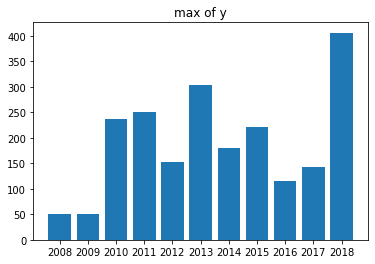

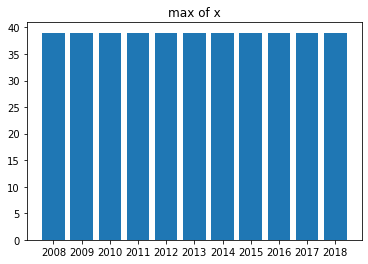

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plotLineGraphByYear(all_data, option, y, title, year_start, year_end):
  data = [all_data[i][y].dropna() for i in range(len(all_data))]
  plt.figure()
  plt.title(title)
  plt.xticks(np.arange(year_start, year_end, 1))
  x = [i for i in range(year_start, year_end)]
  max_value = []
  for i in range(year_end - year_start):
    if option == 'max':
      max_value.append(np.max(data[i].values))
    elif option == 'mean':
      max_value.append(np.mean(data[i].values))
  plus = 0
  # plt.ylim(min(max_value) - plus, max(max_value) + plus)
  # plt.ylim(34, max(max_value) + plus)
  plt.bar(x, max_value)
  plt.show()

year_start = 2008
year_end = 2019
plotLineGraphByYear(data_by_year, 'max', '人数', 'max of y', year_start, year_end)
# plotLineGraphByYear(all_data, 'mean', '人数', 'mean of y', year_start, year_end)
plotLineGraphByYear(data_by_year, 'max', '最高気温', 'max of x', year_start, year_end)
# plotLineGraphByYear(all_data, 'mean', '最高気温', 'mean of x', year_start, year_end)

None


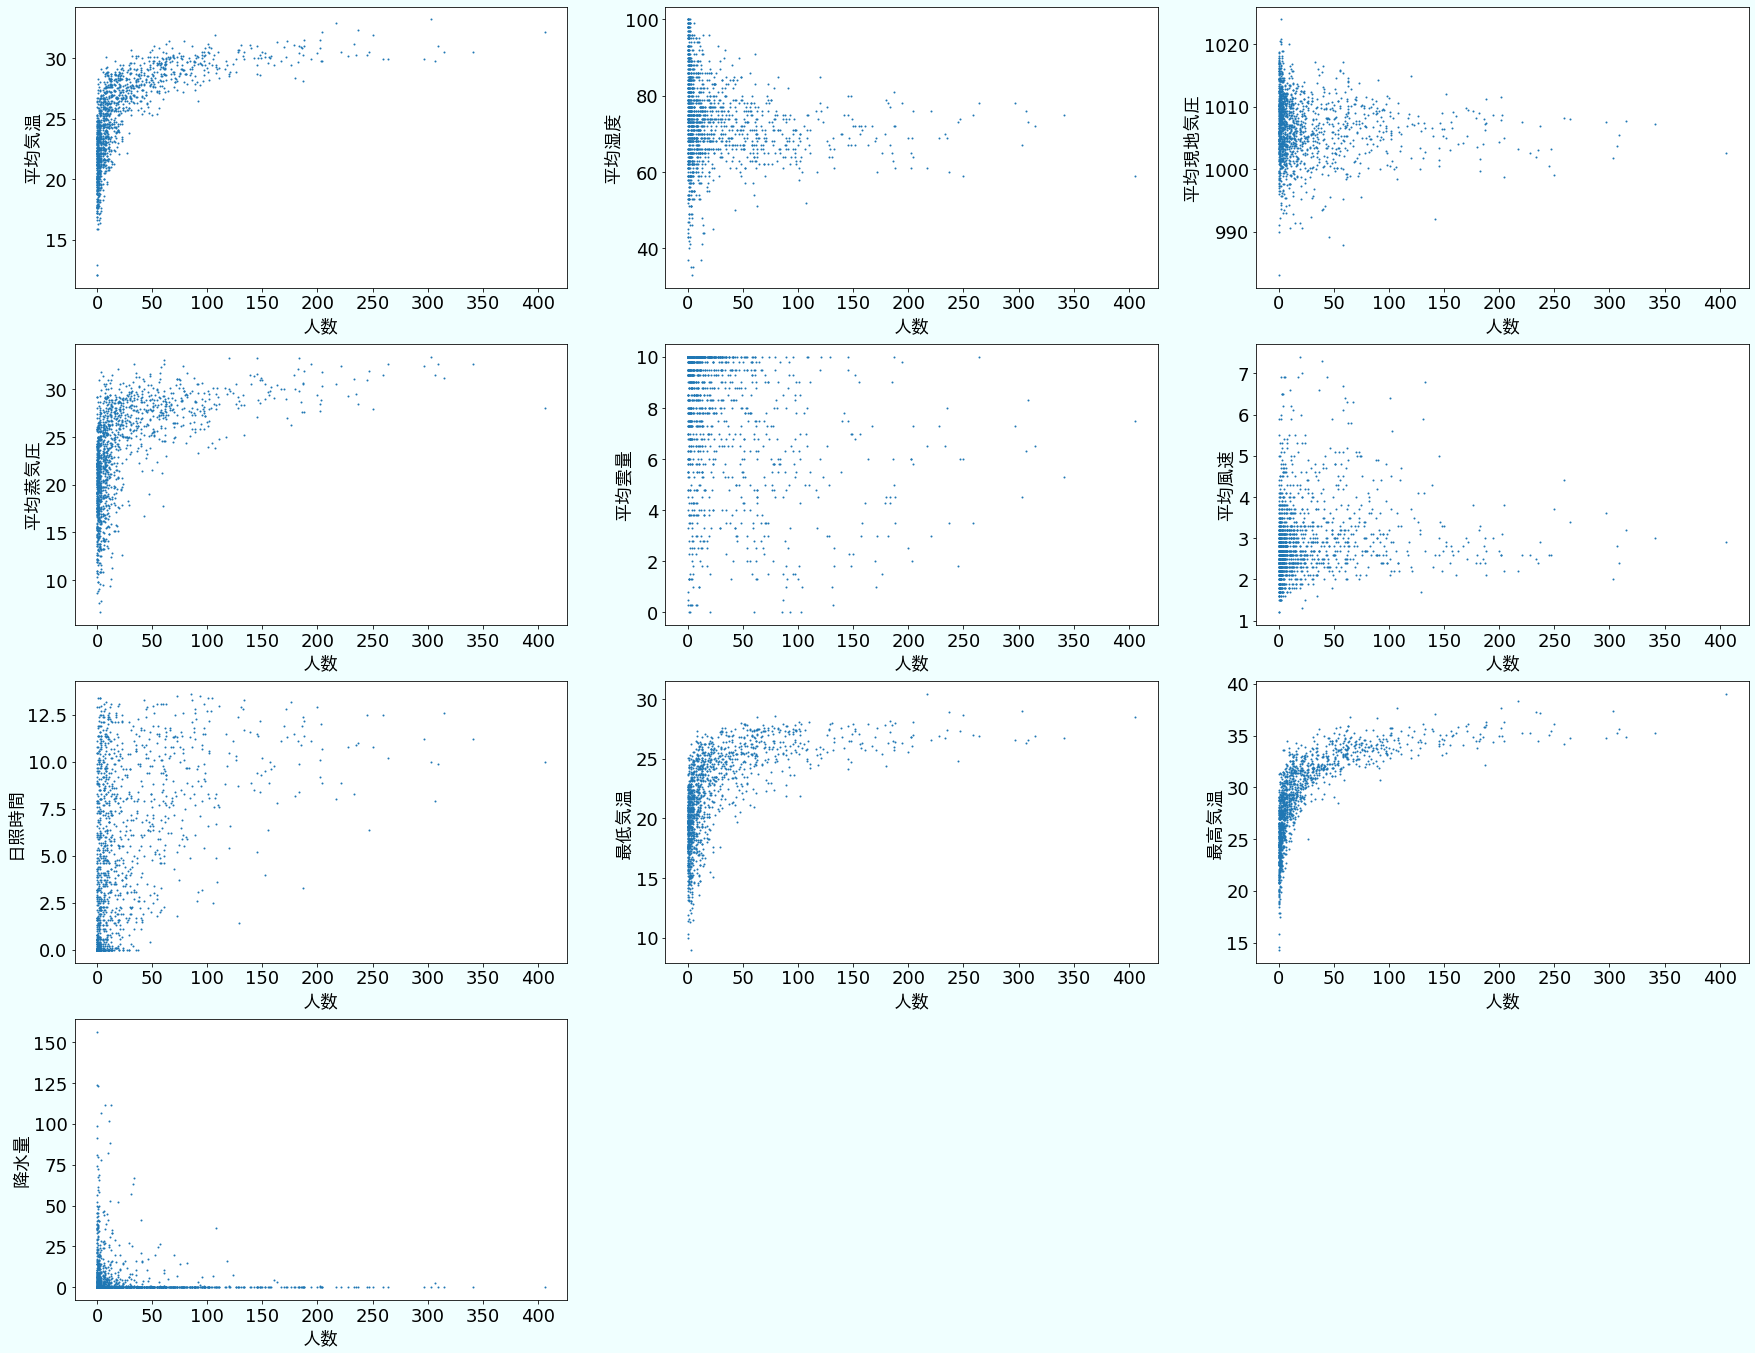

In [42]:
import matplotlib.pyplot as plt

data = delUnneededData(all_data, ['日付'])
plt.figure(figsize=(30,30), facecolor="azure")
plt.rcParams["font.size"] = 18
i = 0
for name in data.columns:
  if name == '人数':
    continue
  plt.subplot(5, 3, i+1)
  plt.scatter(data['人数'], data[name], s=1)
  plt.xlabel('人数', **jp_font)
  plt.ylabel(name, **jp_font)
  i += 1
plt.show()